<a href="https://colab.research.google.com/github/rdonald03/cap-comp215/blob/main/Test_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import statistics
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


#Dictionary stuff + Generators


In [3]:
#Lab 3 has some good stuff on how to do dictionary bs

#Generators

#Are faster than list comprehension

#list comp
list_comp = [i**3 for i in range (10)]
#returns a list

generator = (i**2 for i in range (10))
#returns a generator, can use a for loop to iterate, or next()



#List stuff/Comprehension

In [4]:
#Accumulator
def hazard_detect ():
  q = 0
  for i in neos:
    if i ['is_potentially_hazardous_asteroid'] == True:
      q = q + 1
    else:
      q = q + 0
  return q

#List comprehension
def hazard_detect (neos):
  x = len([i for i in neos if i['is_potentially_hazardous_asteroid'] == True])
  return x 


#Graphing

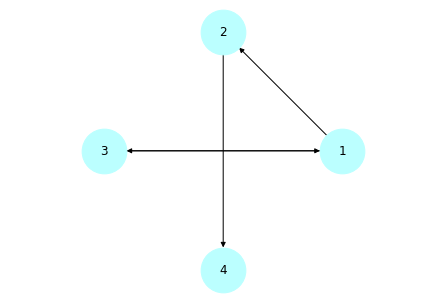

In [15]:
#Graph traversal algorithm
def reachable_nodes(graph, start):
    """ return the set of nodes that are reachable from the given start node"""
    seen = set() # Initialize a set to store visited nodes
    stack = [start] # Initialize a stack to store nodes to visit
    
    while stack: # While there are nodes to visit
        node = stack.pop() # Get the next node to visit from the stack
        
        if node not in seen: # If the node hasn't been visited yet
            seen.add(node) # Mark the current node as visited
            stack.extend(graph.neighbors(node)) # Add unvisited neighbors to the stack
            
    return seen # Return the set of visited nodes





#Plotting graphs

Example = nx.DiGraph() #Creates the graphs, don't confuse with plot
"""Node creation"""
Example.add_node("1")
Example.add_node("2")
Example.add_node("3")
Example.add_node("4")
"""Edge creation"""
Example.add_edge('1', '2')
Example.add_edge('2', '4')
Example.add_edge('3', '1')
Example.add_edge('1', '3')

#Circular just makes circurlar, nx.draw () if not circular
nx.draw_circular(Example,                     
                 node_color = '#bbffff',
                 node_size=2000,
                 with_labels=True)
plt.axis ('equal')
plt.show ()


#1d arrays'

In [5]:
og_list = [1,2,3,4,5] #remember that array's can only be one data type, so if list had a mix, wouldn't work

array = np.array (og_list)


print (array[3])
print (array * 2)
print (array + 1)

print (og_list * 2) #see how it's different with a list than array


print (np.max (array))
print (np.min (array))
print (np.mean (array))
print (np.std(array))

4
[ 2  4  6  8 10]
[2 3 4 5 6]
[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
5
1
3.0
1.4142135623730951


#Algorithms

In [17]:
from re import X
#Correlation/ Sliding dot-product

def dot_product(a, w):
    """ return the dot product of numpy.array a and vector w, to length of w """
    return sum(a * w)   # numpy.array defines multiplication as vector multiplication
assert dot_product(np.array([0,1,1]), [4,2,1]) == 3

def sliding_dot_product(row, window):
    """ Compute rule indexes from dot product at each window pos. """
    N = len(window)
    cols = len(row)-N+1
    c = [ dot_product(row[k:k+N], window) for k in range(cols) ]
    return np.array(c)
assert all( sliding_dot_product(np.array([1,1,0,0,1,0,0,0]), [4,2,1]) == [6, 4, 1, 2, 4, 0] )

row = np.array([1,1,0,0,1,0,0,0])
window = [4,2,1]
print('Indexes to choose next state for {row} are: {next}'.format(
    row=row, next=sliding_dot_product(row, window)
))

#or in more simple way

POWERS_OF_2 = np.array((4, 2, 1))

def rule_indexes(state): #State is just the rule we put in such as 1,1,0,0,1,0,0,0
    """ Return vector of rule indexes - one index for each 3-cell neighbourhood in the CA state vector. """
    # numpy's version of the "sliding dot product" algorithm;  "pad" ends of state array with extra 0 cell to mitigate edge effects
    return np.correlate(np.pad(state, 1, mode='constant'), POWERS_OF_2, mode='valid')

#Matrix operators


x = np.arange(0,10,1)
x

y = np.linspace(0,1,21)
y





Indexes to choose next state for [1 1 0 0 1 0 0 0] are: [6 4 1 2 4 0]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Big O analysis

In [6]:
List = [1,2,3,4,5,6,7,8,9,10]


def bigO_of_1 (List): # (O(1))     Constant time complexity, same time to run regardless of input data
  print (list[0])



def bigO_of_n (List): #(O(n))      Linear time complexity, Bigger the input data, longer the run time 
  for i in list:
    print (i)


def bigO_of_n_squared (List): # (O(n^2))  This also applies to larger powers, 9 for loops = (O(n^9))
  for i in range (len(List)):
    for j in range (len(List)):
      print (List[i], List[j])

def bigO_of_log_n(n): # (O(log n))   Longer to run as data size increase, but rate of increase slows as data increases
    count = 0
    while n > 0:
        count += n % 2
        n //= 2
    return count




#Classes

In [10]:
from dataclasses import dataclass
class Examp1:
  def __init__(self, name, cash):
    self.name = name
    self.cash = cash

  def intro(self):
    print (f"Hey my name is {self.name} and I have {self.cash} dollars")

person = Examp1("Cooper", 27)

person.intro ()



@dataclass
class Examp2:
  name: str
  cash: int


  def intro(self):
    print (f"Hey my name is {self.name} and I have {self.cash} dollars")


person2 = Examp2("Gabe", 23)

person2.intro ()




@dataclass
class Rectangle:
    width: float
    height: float

    @classmethod         #When using on the class itself, otherwise don't use
    def from_square(cls, side: float) -> 'Rectangle':
        return cls(side, side)


rect1 = Rectangle(width=5, height=10)
print (rect1)

rect2 = Rectangle.from_square(side=7)
print (rect2)

Hey my name is Cooper and I have 27 dollars
Hey my name is Gabe and I have 23 dollars
Rectangle(width=5, height=10)
Rectangle(width=7, height=7)
